In [1]:
from causalUtils import generateVariationData, computeMMD2ForGivenSystem
from causalUtils import predictMMDWithSurrogate, plotCausal, GPmodel
from examples import mult_tank_system
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from causal_id_GP import create_multi_tank_system, sys_id_data, identifyCausal

In [3]:
# create multi-tank system
rng = np.random.default_rng(987654)
sys = create_multi_tank_system(rng)

In [4]:
# predefined variables
numT = 400 # number of time steps
test_infl_of = [0, 2, 4, 6, 8, 9] # index for causal variables, 0-7 are for state variables and their first order derivatives, 8 and 9 and for input u1 and u2  
test_infl_on = [0, 2, 4, 6] # index for causal variables, 0-7 are for state variables (even numbers) and their first order derivatives (order numbers),
caus = np.zeros((len(test_infl_on), len(test_infl_of)))
mmd = np.zeros((len(test_infl_on), len(test_infl_of)))
causeVars = ['x1', 'x2', 'x3', 'x4', 'u1', 'u2']
effectVars = ['x1', 'x2', 'x3', 'x4']

In [5]:
# sample inputs and collect system states [x_st, u.T]
# x_st contains state variables and their first-order derivatives X numT
# u.T: inpDim x numT
data = sys_id_data(sys, rng, T=numT)
dimState = data[0].shape[0]

In [6]:
# fit the GP model using sampled data
GPs = [GPmodel(gp, data, []) for gp in range(dimState)]

In [7]:
# Identify causal relations
caus, mmd = identifyCausal(GPs, sys, data, test_infl_of, test_infl_on, rng)

In [8]:
# print
print("new causality matrix:")
print(caus)
print("MMD effect:")
print(mmd)

new causality matrix:
[[1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]
MMD effect:
[[0.58810803 0.         0.74323003 0.         0.57362836 0.1001354 ]
 [0.         0.58124624 0.         0.63655314 0.26569795 0.55111569]
 [0.         0.         0.53924538 0.         0.         0.57224303]
 [0.         0.         0.         0.55468    0.5588755  0.        ]]


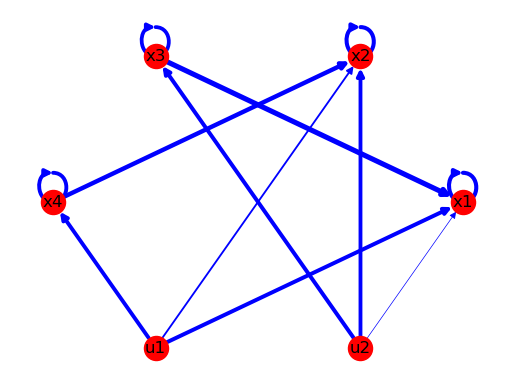

In [9]:
# plot causal relations
plotCausal(causeVars, effectVars, caus, mmd)